In [87]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline

In [88]:
from pandas_datareader import data as pdr

In [89]:
date_end = dt.datetime.today()
date_start = date_end - dt.timedelta(30)

In [90]:
SP500 = pdr.DataReader('^GSPC', 'yahoo', date_start, date_end)

In [91]:
SP500.describe()

,High,Low,Open,Close,Volume,Adj Close
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000
mean,3114.417468,3061.539001,3092.073499,3090.705505,6.142642e+09,3090.705505
std,73.731188,80.101192,75.413824,75.094625,1.316959e+09,75.094625
min,2956.760010,2933.590088,2948.050049,2955.449951,3.952800e+09,2955.449951
25%,3067.047424,2996.000061,3035.377502,3040.015015,5.348810e+09,3040.015015
50%,3121.765015,3063.849976,3100.269897,3089.280029,5.913310e+09,3089.280029
75%,3153.969971,3101.182434,3137.169922,3123.337585,6.682852e+09,3123.337585
max,3233.129883,3196.000000,3213.419922,3232.389893,8.617590e+09,3232.389893


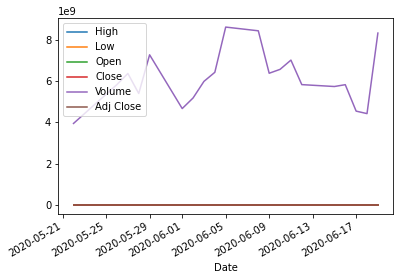

In [92]:
SP500.plot()

Text(0, 0.5, 'lowest price')

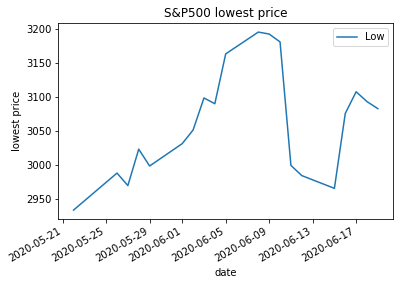

In [93]:
graph3 = SP500.plot(y = 'Low',title='S&P500 lowest price')
graph3.set_xlabel('date')
graph3.set_ylabel('lowest price')

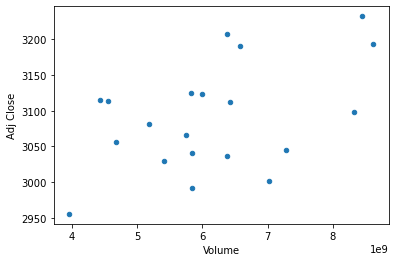

In [94]:
SP500.plot.scatter('Volume', 'Adj Close')

## TSP Fund Data
Download mutual fund index prices for the TSP.

In [95]:
import pandas_datareader.tsp as tsp
tspreader = tsp.TSPReader(start='2015-10-1', end='2015-12-31')
tspreader.read()

,L Income,L 2020,L 2030,L 2040,L 2050,G Fund,F Fund,C Fund,S Fund,I Fund,
date,,,,,,,,,,,
2015-10-01,17.5164,22.5789,24.2159,25.5690,14.4009,14.8380,17.0467,25.7953,34.0993,23.3202,NaN
2015-10-02,17.5707,22.7413,24.4472,25.8518,14.5805,14.8388,17.0924,26.1669,34.6504,23.6367,
2015-10-05,17.6395,22.9582,24.7571,26.2306,14.8233,14.8413,17.0531,26.6467,35.3565,24.1475,
2015-10-06,17.6338,22.9390,24.7268,26.1898,14.7979,14.8421,17.0790,26.5513,35.1320,24.2294,
2015-10-07,17.6639,23.0324,24.8629,26.3598,14.9063,14.8429,17.0725,26.7751,35.6035,24.3671,
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,17.7991,23.3039,25.2052,26.7481,15.1407,14.9093,16.9596,27.7831,35.6084,24.3272,
2015-12-28,17.7950,23.2811,25.1691,26.7015,15.1101,14.9128,16.9799,27.7230,35.4625,24.2816,
2015-12-29,17.8270,23.3871,25.3226,26.8905,15.2319,14.9137,16.9150,28.0236,35.8047,24.4757,


## Nasdaq Trader Symbol Definitions
Download the latest symbols from Nasdaq.

Note that Nasdaq updates this file daily, and historical versions are not available. More information on the field definitions.

In [96]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
print(symbols.loc['IBM']) 

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                    100
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object


In [97]:
print(symbols.loc['SPY'])

Nasdaq Traded               True
Security Name       SPDR S&P 500
Listing Exchange               P
Market Category                 
ETF                         True
Round Lot Size               100
Test Issue                 False
Financial Status             NaN
CQS Symbol                   SPY
NASDAQ Symbol                SPY
NextShares                 False
Name: SPY, dtype: object


## Web scraping SP500 list from Wikipedia table

In [98]:
import requests
website_url = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of S&amp;P 500 companies - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"83b916fe-51aa-4ade-84f7-2ca7a3f70f5a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_S\u0026P_500_companies","wgTitle":"List of S\u0026P 500 companies","wgCurRevisionId":962598882,"wgRevisionId":962598882,"wgArticleId":2676045,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: archived copy as title","All articles with dead external links","Articles with dead extern

In [99]:
wiki_table = soup.find('table',{'class':'wikitable sortable'})

In [100]:
data = []
tHeader = []
SP500_tickers = pd.DataFrame()

for tr in wiki_table.find_all("tr"):
    for th in tr.find_all("th")[:1]:
        tHeader = th.get_text(strip=True)
        SP500_tickers[tHeader] = []
    for td in tr.find_all("td")[:1]:
        data.append( td.get_text(strip=True))
        
SP500_tickers[tHeader] = data

In [101]:
SP500_tickers

,Symbol
0,MMM
1,ABT
2,ABBV
3,ABMD
4,ACN
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


In [111]:
import timeit
%timeit

df = pd.DataFrame()
for i in data[:]:
    symbol = SP500_tickers.loc[SP500_tickers['Symbol']==i]
    symbol_data = pdr.DataReader(i, 'yahoo', date_start, date_end).reset_index()
    single_table = pd.concat([symbol, symbol_data], axis=1, ignore_index=False)
    single_table['Symbol'].ffill(inplace=True)
    #display(symbol_data)
    df = df.append(single_table)
    

Wall time: 0 ns


In [113]:
df = df.loc[df['Date'].notnull()]

In [127]:
df = df.reset_index(drop=True)

In [128]:
df.groupby(['Symbol']).describe().transpose()

Symbol                   ABBV           ABMD           ABT           ACN  \
High      count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.472167e+01     244.964117  9.223632e+01  2.064387e+02   
          std    2.515021e+00      12.618170  1.406679e+00  3.223381e+00   
          min    9.100000e+01     218.979996  8.996000e+01  2.007400e+02   
          25%    9.293250e+01     238.940002  9.134000e+01  2.036050e+02   
          50%    9.487500e+01     247.740005  9.250000e+01  2.066050e+02   
          75%    9.660750e+01     253.179993  9.298500e+01  2.086475e+02   
          max    9.935000e+01     260.450012  9.559000e+01  2.113200e+02   
Low       count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.219611e+01     235.445294  8.947421e+01  2.015831e+02   
          std    2.511338e+00      12.933324  1.589910e+00  3.648632e+00   
          min    8.856000e+01     207.160004  8.694000e+01  1.948300e+02   
          25%    9.010000e+01     230.660004  8.820500e+01  1.991400e+02   
          50%    9.153000e+01     236.100006  8.957000e+01  2.022250e+02   
          75%    9.444000e+01     246.300003  9.062500e+01  2.044300e+02   
          max    9.680000e+01     250.899994  9.204000e+01  2.070000e+02   
Open      count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.340111e+01     239.418234  9.101737e+01  2.043469e+02   
          std    2.477268e+00      13.938004  1.685895e+00  3.268785e+00   
          min    9.028000e+01     207.880005  8.752000e+01  1.964900e+02   
          25%    9.106750e+01     233.789993  8.985000e+01  2.016825e+02   
          50%    9.320500e+01     239.960007  9.105000e+01  2.049700e+02   
          75%    9.540750e+01     252.039993  9.244000e+01  2.063825e+02   
          max    9.772000e+01     254.220001  9.295000e+01  2.093900e+02   
Close     count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.346667e+01     241.742941  9.080737e+01  2.043194e+02   
          std    2.402680e+00      11.923999  1.777135e+00  3.916076e+00   
          min    8.998000e+01     217.360001  8.778000e+01  1.959500e+02   
          25%    9.134500e+01     235.600006  8.964500e+01  2.016125e+02   
          50%    9.306000e+01     245.619995  9.068000e+01  2.038900e+02   
          75%    9.598000e+01     250.850006  9.213000e+01  2.072950e+02   
          max    9.690000e+01     257.089996  9.492000e+01  2.112800e+02   
Volume    count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.169656e+06  549905.882353  6.818347e+06  2.325506e+06   
          std    2.321108e+06  188309.836010  2.049355e+06  7.061283e+05   
          min    4.571600e+06  324000.000000  4.359100e+06  1.530800e+06   
          25%    8.128450e+06  404000.000000  5.439200e+06  1.861125e+06   
          50%    9.260300e+06  495400.000000  6.022900e+06  2.248800e+06   
          75%    9.611550e+06  729400.000000  8.112300e+06  2.536025e+06   
          max    1.378160e+07  972200.000000  1.187450e+07  4.046600e+06   
Adj Close count  1.800000e+01      17.000000  1.900000e+01  1.600000e+01   
          mean   9.346667e+01     241.742941  9.080737e+01  2.043194e+02   
          std    2.402680e+00      11.923999  1.777135e+00  3.916076e+00   
          min    8.998000e+01     217.360001  8.778000e+01  1.959500e+02   
          25%    9.134500e+01     235.600006  8.964500e+01  2.016125e+02   
          50%    9.306000e+01     245.619995  9.068000e+01  2.038900e+02   
          75%    9.598000e+01     250.850006  9.213000e+01  2.072950e+02   
          max    9.690000e+01     257.089996  9.492000e+01  2.112800e+02   

Symbol                    MMM  
High      count  2.000000e+01  
          mean   1.605780e+02  
          std    5.395296e+00  
          min    1.466400e+02  
          25%    1.580075e+02  
          50%    1.600600e+02  
          75%    1.627800e+02  
          max    1.

In [168]:
df.groupby(['Symbol', 'Date']).sum()

High         Low        Open       Close    Volume  \
Symbol Date                                                                   
ABBV   2020-05-27   91.000000   88.559998   90.540001   89.980003  12529500   
       2020-05-28   91.190002   90.000000   90.870003   90.029999   8765900   
       2020-05-29   92.889999   89.599998   91.000000   92.669998  13781600   
       2020-06-01   93.059998   90.690002   92.050003   90.699997   8486500   
       2020-06-02   91.699997   90.050003   90.970001   91.040001   9413300   
...                       ...         ...         ...         ...       ...   
MMM    2020-06-15  159.619995  150.490005  150.880005  157.729996   4093800   
       2020-06-16  163.380005  156.889999  162.850006  159.669998   3386700   
       2020-06-17  160.869995  158.970001  160.199997  159.220001   1714600   
       2020-06-18  159.830002  157.589996  158.070007  159.210007   1806100   
       2020-06-19  162.089996  156.470001  161.350006  158.149994   6405200   

                    Adj Close  
Symbol Date                    
ABBV   2020-05-27   89.980003  
       2020-05-28   90.029999  
       2020-05-29   92.669998  
       2020-06-01   90.699997  
       2020-06-02   91.040001  
...                       ...  
MMM    2020-06-15  157.729996  
       2020-06-16  159.669998  
       2020-06-17  159.220001  
       2020-06-18  159.210007  
       2020-06-19  158.149994  

[90 rows x 6 columns]

In [173]:
df = df.groupby(['Date', 'Symbol']).sum()

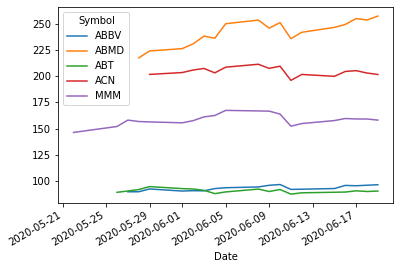

In [175]:
df['Close'].unstack().plot()